In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# Read salary data
file_path = Path("Resources/lending_data.csv")
df_lending = pd.read_csv(file_path)

# Review the DataFrame
df_lending.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_lending['loan_status']

# Separate the X variable, the features
X = df_lending.drop('loan_status', axis=1)

In [4]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model for reproducibility
logistic_model = LogisticRegression(random_state=1)

# Fit the model using the training data
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
y_pred = logistic_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Print the balanced_accuracy score of the model
balanced_acc_score = balanced_accuracy_score(y_test, y_pred)

# Print the balanced accuracy score
print("Balanced Accuracy Score:", balanced_acc_score)

Balanced Accuracy Score: 0.9521352751368186


In [11]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(
    conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Print the confusion matrix
display(conf_matrix_df)

,Predicted 0,Predicted 1
Actual 0,14926,75
Actual 1,46,461


Text(0.5, 1.1, 'Confusion Matrix Logistic Regression')

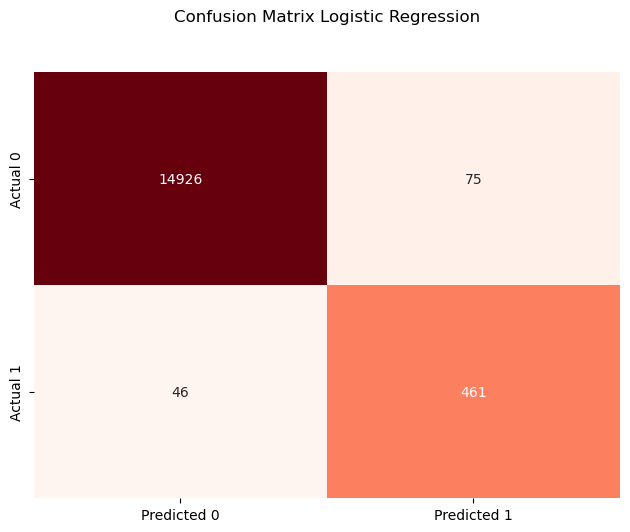

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0,1]

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(conf_matrix_df, 
            annot=True, 
            cmap="Reds",
            fmt='g', 
            vmax = 1000, 
            cbar=False) # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Logistic Regression', y = 1.1)

**Summary:**

The model correctly identified 14926 healthy loans as healthy (true negatives).

The model incorrectly classified 75 healthy loans as high-risk loans (false positives).

The model incorrectly classified 46 high-risk loans as healthy loans (false negatives).

The model correctly identified 461 high-risk loans as high-risk (true positives).

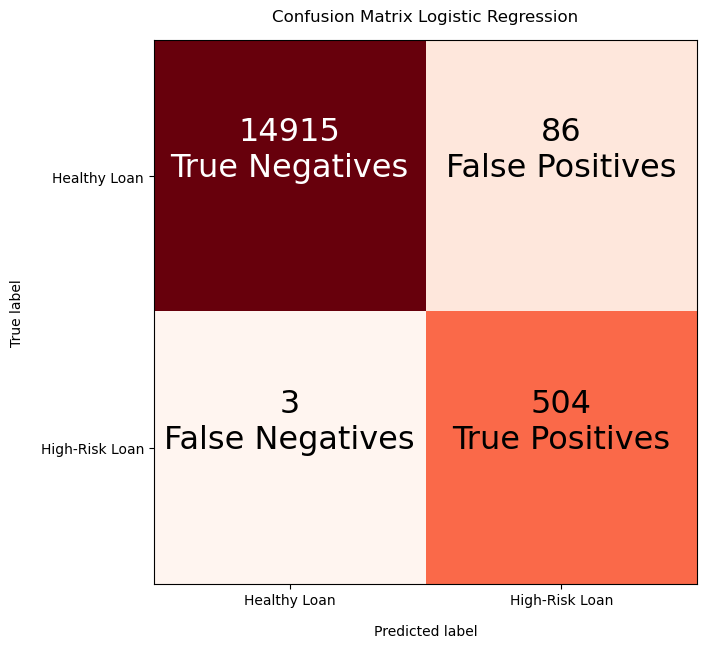

In [62]:
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap="Reds", vmax=None, cbar=False):
    """
    This function prints and plots the confusion matrix.
    """        
    plt.imshow(cm, interpolation='nearest', cmap=cmap, vmax=vmax)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0 and j == 0:
            name = "True Negatives"
        elif i == 0 and j == 1:
            name = "False Positives"
        elif i == 1 and j == 1:
            name = "True Positives"
        else:
            name = "False Negatives"
        plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', labelpad=12)
    plt.xlabel('Predicted label', labelpad=12)
    plt.title(title, y=1.02)
    plt.tight_layout()

conf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Define class names
class_names = ['Healthy Loan', 'High-Risk Loan']

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 6.6))
plt.grid(False)
plot_confusion_matrix(conf_matrix, classes=class_names, title='Confusion Matrix Logistic Regression', vmax=1000)
plt.savefig('confusion_matrix_plot_logistic_regression.png')
plt.show()

In [39]:
# Print the classification report for the model
print(f"Balanced Accuracy Score : {balanced_acc_score}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Balanced Accuracy Score : 0.9521352751368186
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.85      0.99      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Based on the classification report, the logistic regression model shows high performance in predicting both the 0 (healthy loan) and 1 (high-risk loan) labels. Here are the key metrics:

Precision:

For label 0 (healthy loan), the precision is 1.00, which means the model correctly identifies all healthy loans with no false positives.
For label 1 (high-risk loan), the precision is 0.86, indicating that the model correctly identifies 86% of high-risk loans among the predicted positive cases.
Recall (Sensitivity):

For label 0 (healthy loan), the recall is 1.00, which means the model identifies all actual healthy loans with no false negatives.
For label 1 (high-risk loan), the recall is 0.91, indicating that the model captures 91% of the actual high-risk loans.
F1-score:

The F1-score is a harmonic mean of precision and recall, balancing both metrics. The F1-score for label 0 is 1.00, and for label 1, it is 0.88.
Overall, the model performs very well in predicting both healthy loans and high-risk loans, with a balanced accuracy of 0.95. The macro-average F1-score (0.94) and weighted-average F1-score (0.99) indicate that the model is effective in handling class imbalance and generalizes well across classes.

In summary, the logistic regression model demonstrates strong predictive power for both healthy and high-risk loans. As stated, it is very accurate, but it still incorrectly classified 46 high-risk loans as healthy loans. As a bank, it may be tough to swallow that many bad loans and it would probably want a more conservative model.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [40]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# Assign a random_state parameter of 1 to the model for reproducibility
oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [41]:
# Count the distinct values of the resampled labels data
distinct_values_count = pd.Series(y_train_resampled).value_counts()

# Print the count of distinct values
print(distinct_values_count)

0    60035
1    60035
Name: loan_status, dtype: int64


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [42]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_model = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make a prediction using the testing data
y_pred = logistic_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [43]:
# Print the balanced_accuracy score of the model 
balanced_acc_score_2 = balanced_accuracy_score(y_test, y_pred)

# Print the balanced accuracy score
print("Balanced Accuracy Score:", balanced_acc_score_2)

Balanced Accuracy Score: 0.9941749445500477


In [46]:
conf_matrix_2 = confusion_matrix(y_test, y_pred)

conf_matrix_df_2 = pd.DataFrame(
    conf_matrix_2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Print the confusion matrix
display(conf_matrix_df_2)

,Predicted 0,Predicted 1
Actual 0,14915,86
Actual 1,3,504


Text(0.5, 1.1, 'Confusion Matrix with Oversampled Data')

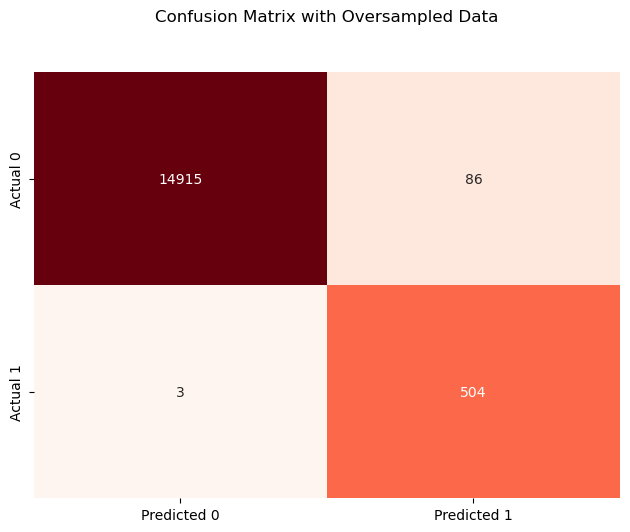

In [48]:
sns.heatmap(conf_matrix_df_2, 
            annot=True, 
            cmap="Reds",
            fmt='g', 
            vmax = 1000, 
            cbar=False)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix with Oversampled Data', y = 1.1)

**Summary:** 

The model correctly identified 14915 healthy loans as healthy (true negatives).

The model incorrectly classified 86 healthy loans as high-risk loans (false positives).

The model incorrectly classified 3 high-risk loans as healthy loans (false negatives).

The model correctly identified 504 high-risk loans as high-risk (true positives).

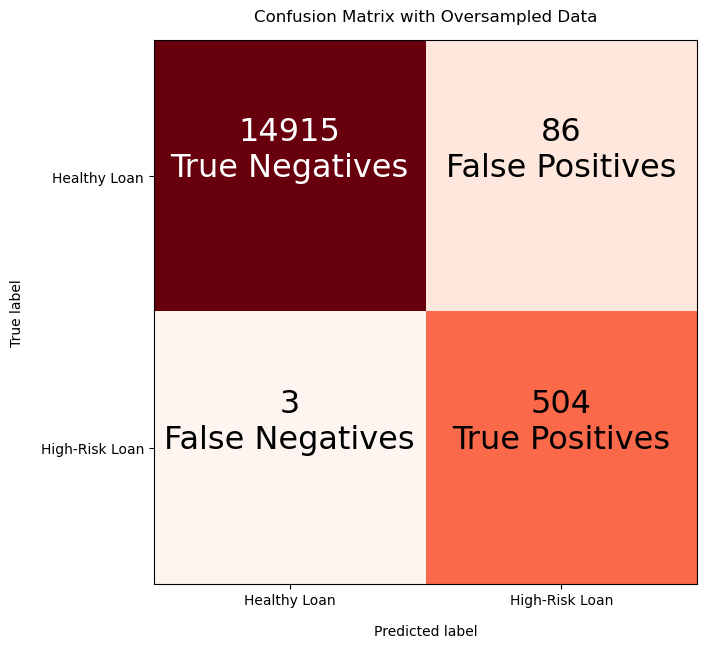

In [61]:
# Define class names
class_names = ['Healthy Loan', 'High-Risk Loan']

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 6.6))
plt.grid(False)
plot_confusion_matrix(conf_matrix_2, classes=class_names, title='Confusion Matrix with Oversampled Data', vmax=1000)
plt.savefig('confusion_matrix_oversampled.png')
plt.show()

In [49]:
# Print the classification report
print("Balanced Accuracy Score:", balanced_acc_score_2)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Balanced Accuracy Score: 0.9941749445500477
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.85      0.99      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Based on the classification report, the logistic regression model, fit with oversampled data, demonstrates better performance in predicting both the 0 (healthy loan) and 1 (high-risk loan) labels. 

Here are the key metrics:


For label 0 (healthy loan), the precision is 1.00, which means the model correctly identifies all healthy loans with no false positives.
For label 1 (high-risk loan), the precision is 0.85, indicating that the model correctly identifies 85% of high-risk loans among the predicted positive cases.

For label 0 (healthy loan), the recall is 0.99, which means the model captures 99% of the actual healthy loans.
For label 1 (high-risk loan), the recall is 0.99, indicating that the model captures 99% of the actual high-risk loans.

The F1-score for label 0 is 1.00, and for label 1, it is 0.92.

Overall, the model demonstrates high predictive accuracy and performs well in identifying both healthy loans and high-risk loans after addressing the class imbalance issue through resampling. The macro-average F1-score (0.96) and weighted-average F1-score (0.99) indicate that the model generalizes effectively across classes and exhibits balanced performance.

In summary, the logistic regression model, trained on the oversampled data, is a more relaiable tool and conservative model for predicting both healthy and high-risk loans, making it valuable for assessing loan risk in this scenario. While there are slighly more false positives i.e. (the model incorrectly classified 86 healthy loans as high-risk loans as opposed to 75 in the first model), this model almost eliminated false negatives i.e. (it incorrectly classified 3 high-risk loans as healthy loans as opposed to 46 in the first model).

For loan seekers, this model might provide for some frustating expereinces, but for a risk adverse bank, this model performs extremely well and would proably be adopted over the pervious model without the oversampled data.  